<a href="https://colab.research.google.com/github/KlaraDewitte/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Copy_of_Poging1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")

testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")


In [0]:
print(trainset.head())
print(trainset.shape)
print(testset.head())
print(testset.shape)


       AF3       F7       F3      FC5  ...       F4       F8      AF4  label
0  4299.49  3997.44  4277.95  4116.92  ...  4278.97  4600.00  4369.23      1
1  4302.05  3985.64  4261.03  4129.74  ...  4283.08  4607.18  4358.46      0
2  4321.03  4015.90  4265.13  4122.56  ...  4286.15  4608.21  4371.79      0
3  4408.21  4104.10  4380.00  4232.31  ...  4388.21  4715.90  4464.10      0
4  4347.18  3975.38  4266.67  4102.56  ...  4313.33  4664.10  4411.79      1

[5 rows x 15 columns]
(2000, 15)
       AF3       F7       F3      FC5  ...       F4       F8      AF4  index
0  4296.41  4040.51  4253.33  4124.10  ...  4268.72  4598.46  4342.56      0
1  4291.28  3994.36  4247.18  4102.56  ...  4260.51  4593.33  4337.95      1
2  4299.49  4019.49  4269.74  4116.41  ...  4280.51  4596.92  4350.26      2
3  4280.00  4004.62  4263.59  4120.51  ...  4271.79  4608.72  4344.10      3
4  4317.44  3968.72  4260.51  4101.54  ...  4282.05  4592.31  4372.82      4

[5 rows x 15 columns]
(12892, 15)


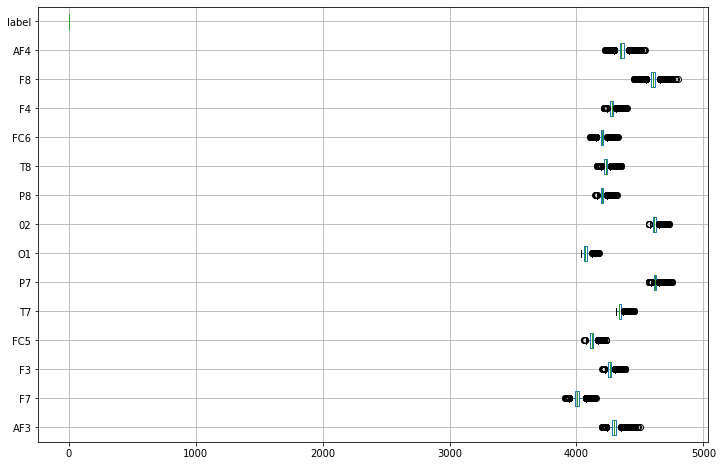

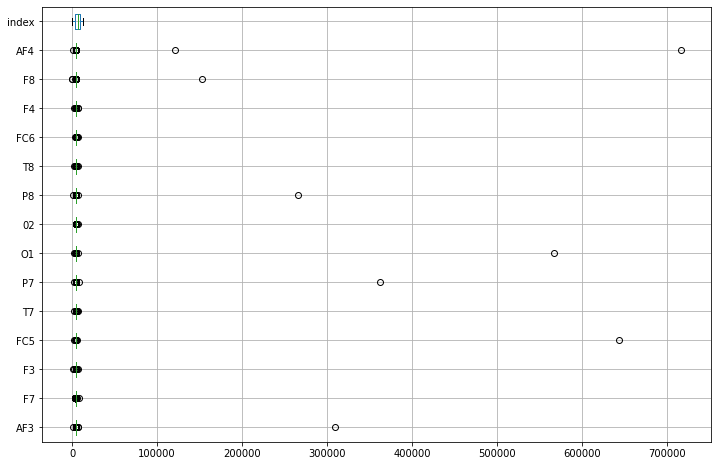

In [0]:
plt.figure(figsize=(12,8))
trainset.boxplot(vert=False)
plt.show()

plt.figure(figsize=(12,8))
testset.boxplot(vert=False)
plt.show()


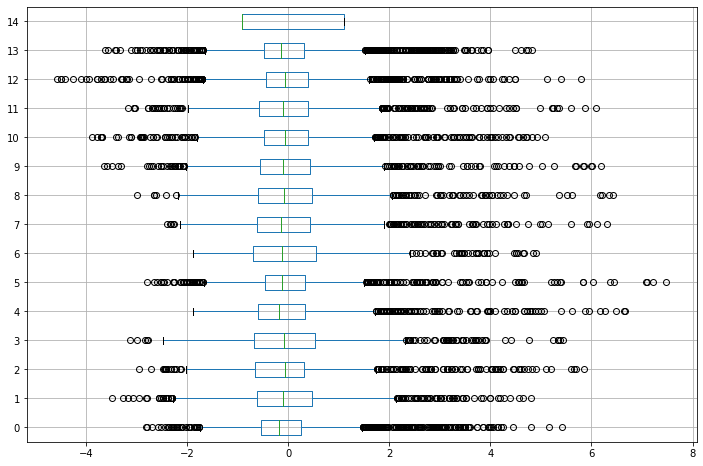

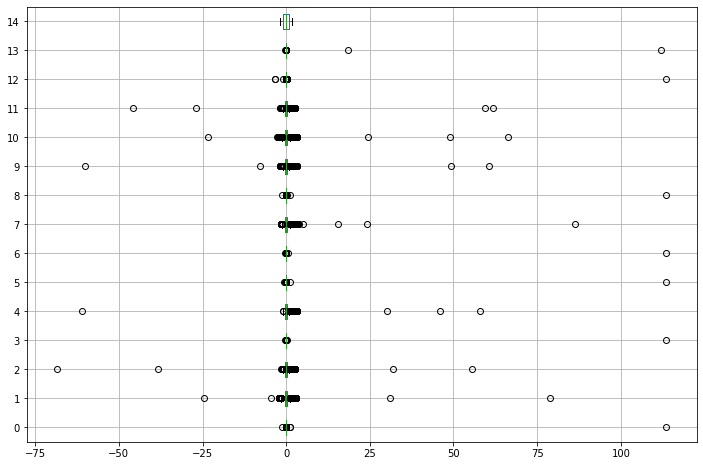

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(trainset)
trainset_scaled = pd.DataFrame(scaler.transform(trainset))
plt.figure(figsize=(12,8))
trainset_scaled.boxplot(vert=False)
plt.show()


scaler = StandardScaler()
scaler.fit(testset)
testset_scaled = pd.DataFrame(scaler.transform(testset))
plt.figure(figsize=(12,8))
testset_scaled.boxplot(vert=False)
plt.show()


In [0]:
print(trainset_scaled.head())
print(testset_scaled.head())

         0         1         2   ...        12        13        14
0 -0.018351 -0.396476  0.677912  ... -0.156365  0.252992  1.104426
1  0.052070 -0.791842 -0.136210  ...  0.060820 -0.037576 -0.905448
2  0.574178  0.222036  0.061066  ...  0.091976  0.322059 -0.905448
3  2.972354  3.177226  5.588146  ...  3.349453  2.812530 -0.905448
4  1.293521 -1.135609  0.135164  ...  1.782573  1.401236  1.104426

[5 rows x 15 columns]
         0         1         2   ...        12        13        14
0 -0.010808  0.637498 -0.227519  ... -0.014097 -0.013075 -1.731916
1 -0.012718 -0.322712 -0.357935  ... -0.018036 -0.013801 -1.731648
2 -0.009661  0.200150  0.120467  ... -0.015279 -0.011863 -1.731379
3 -0.016917 -0.109240 -0.009948  ... -0.006219 -0.012833 -1.731110
4 -0.002979 -0.856185 -0.075262  ... -0.018819 -0.008310 -1.730842

[5 rows x 15 columns]


In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(trainset_scaled, trainset[['label']])


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model = LogisticRegression(C=1)
model.fit(trainset_scaled, trainset[['label']])
score = model.score(trainset_scaled, trainset[['label']])
print(score)

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
predictions = model.predict_proba(testset_scaled)[:,1]
print(predictions)

[1.97621325e-05 2.28345108e-05 2.27842071e-05 ... 9.99906626e-01
 9.99906849e-01 9.99912306e-01]


In [93]:
dfpredictions= pd.DataFrame(({'index': testset['index'], 'label':predictions}))
print(dfpredictions)

       index     label
0          0  0.000020
1          1  0.000023
2          2  0.000023
3          3  0.000022
4          4  0.000027
...      ...       ...
12887  12887  0.999911
12888  12888  0.999912
12889  12889  0.999907
12890  12890  0.999907
12891  12891  0.999912

[12892 rows x 2 columns]


In [0]:
filename = "my_prediction_results2.csv"

#make sure to not write the Pandas index column (index=False)
dfpredictions.to_csv(filename,index=False)